In [2]:
import numpy as np
import matplotlib.pyplot as plt

# add the path to my packages to system paths so they can be imported
import sys
# sys.path.append('/home/yasamanparhizkar/Documents/yorku/01_thesis/code/my_packages')
sys.path.append('F:\MAScThesis\code\my_packages')

import my_first_feature_extractor as fe
import compare_with_benchmark as bn
import my_similarity_graph_fitter as sg

# Test jointly with SIFT

## Download mnist and extract SIFT descriptors

In [3]:
# define parameters of feature extraction block
data_params = {'name': 'mnist'}
allocation_params = {'portion': 0.005, 'fracs': [0.6, 0.4], 'seed': 0}
sift_params = {} # all default
kpnum_params = {'min': 2, 'max': 2}
normalize = True
return_imgs = False
save = True
savepath = '../../../data/fe_pt/'
img_sz = (28, 28)

# extract features from mnist images
num_train, num_val, train_data, val_data = \
fe.xsift_from_data(data_params, allocation_params, sift_params, kpnum_params, \
                   normalize, return_imgs, save, savepath, img_sz)

In [4]:
print('We have {} training images and {} validation images'.format(num_train, num_val))

We have 41 training images and 26 validation images


In [5]:
pers = fe.class_percentages(train_data['lbls'], [0, 1], fe.train_times)
for i in range(2):
    print('{:.2f}% of the training data is class {}, corresponding to {} data points'\
          .format(pers[i], i, round(pers[i]*num_train/100)))

print('Computing these statistics took {:.3f} ms.\n'.format(fe.train_times['class_percentages']*1000))

pers = fe.class_percentages(val_data['lbls'], [0, 1], fe.val_times)
for i in range(2):
    print('{:.2f}% of the validation data is class {}, corresponding to {} data points'\
          .format(pers[i], i, round(pers[i]*num_val/100)))

print('Computing these statistics took {:.3f} ms.'.format(fe.val_times['class_percentages']*1000))

39.02% of the training data is class 0, corresponding to 16 data points
60.98% of the training data is class 1, corresponding to 25 data points
Computing these statistics took 0.998 ms.

50.00% of the validation data is class 0, corresponding to 13 data points
50.00% of the validation data is class 1, corresponding to 13 data points
Computing these statistics took 0.998 ms.


# Train and validate a neural network on the data

In [6]:
# define gradient descent parameters
opt_params = { 'epsilon0':1, 'epsilon_decay':0.5, 'epsilon_jump': 1.5, \
              'num_its':16, 'check_freq':1, 'print_checks':True, 'Theta0':None, \
              'seed':0, 'force_all_its': True, 'threshold': 0.02}

# define neural network architecture
num_classes = 2
arch_params = { 'num_hidden_layers':1, 'num_hidden_units':5, 'num_outs':num_classes, \
               'act_func':bn.relu, 'out_func':bn.softmax, 'loss_func':bn.crossent }

# fit neural network to the training images and measure accuracy on validation set
forced_Theta, forced_stats = bn.fit(train_data['des'], train_data['lbls'], opt_params, arch_params, show_nrmdE=False)

forced_val_acc, forced_val_loss = bn.get_acc(val_data['des'], val_data['lbls'], arch_params, forced_Theta)
print('\nval acc = {:.2f}\nval loss = {:.5f}'.format(forced_val_acc, forced_val_loss))

   0: eps = 1.50e+00;  train loss (E) =  0.67
   1: eps = 2.25e+00;  train loss (E) =  0.66
   2: eps = 3.38e+00;  train loss (E) =  0.66
   3: eps = 5.06e+00;  train loss (E) =  0.65
   4: eps = 7.59e+00;  train loss (E) =  0.58
   5: eps = 1.14e+01;  train loss (E) =  0.19
   6: eps = 2.14e+00;  train loss (E) =  0.15
   7: eps = 1.60e+00;  train loss (E) =  0.13
   8: eps = 1.20e+00;  train loss (E) =  0.09
   9: eps = 1.80e+00;  train loss (E) =  0.08
  10: eps = 2.70e+00;  train loss (E) =  0.07
  11: eps = 2.03e+00;  train loss (E) =  0.05
  12: eps = 1.52e+00;  train loss (E) =  0.04
  13: eps = 2.28e+00;  train loss (E) =  0.03
  14: eps = 3.42e+00;  train loss (E) =  0.02
  15: eps = 5.13e+00;  train loss (E) =  0.02

val acc = 0.92
val loss = 0.21964


In [7]:
# define gradient descent parameters
opt_params = { 'epsilon0':1, 'epsilon_decay':0.5, 'epsilon_jump': 1.5, \
              'num_its':16, 'check_freq':1, 'print_checks':True, 'Theta0':None, \
              'seed':0, 'force_all_its': False, 'threshold': 0.02}

# define neural network architecture
num_classes = 2
arch_params = { 'num_hidden_layers':1, 'num_hidden_units':5, 'num_outs':num_classes, \
               'act_func':bn.relu, 'out_func':bn.softmax, 'loss_func':bn.crossent }

# fit neural network to the training images and measure accuracy on validation set
flex_Theta, flex_stats = bn.fit(train_data['des'], train_data['lbls'], opt_params, arch_params, show_nrmdE=False)

flex_val_acc, flex_val_loss = bn.get_acc(val_data['des'], val_data['lbls'], arch_params, flex_Theta)
print('\nval acc = {:.2f}\nval loss = {:.5f}'.format(flex_val_acc, flex_val_loss))

   0: eps = 1.50e+00;  train loss (E) =  0.67
   1: eps = 2.25e+00;  train loss (E) =  0.66

val acc = 0.50
val loss = 0.71735


Text(0.5, 1.0, 'Time spent to find a valid stepsize in each iteration')

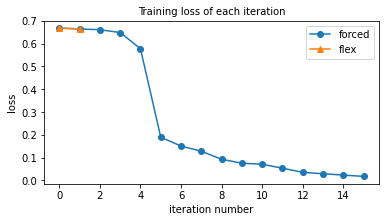

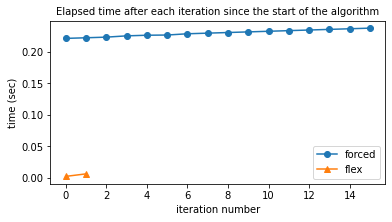

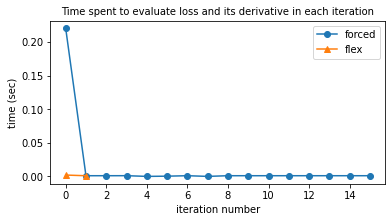

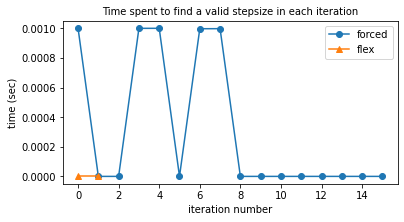

In [8]:
# Some informative figures to compare forced and flexible time complexity
plt.figure(figsize=(6,3))
plt.plot(forced_stats['train_losss'], marker='o')
plt.plot(flex_stats['train_losss'], marker='^')
plt.legend(['forced', 'flex'])
plt.xlabel('iteration number')
plt.ylabel('loss')
plt.title('Training loss of each iteration', fontsize=10)

plt.figure(figsize=(6,3))
plt.plot(forced_stats['it_times'], marker='o')
plt.plot(flex_stats['it_times'], marker='^')
plt.legend(['forced', 'flex'])
plt.xlabel('iteration number')
plt.ylabel('time (sec)')
plt.title('Elapsed time after each iteration since the start of the algorithm', fontsize=10)

plt.figure(figsize=(6,3))
plt.plot(forced_stats['eval_times'], marker='o')
plt.plot(flex_stats['eval_times'], marker='^')
plt.legend(['forced', 'flex'])
plt.xlabel('iteration number')
plt.ylabel('time (sec)')
plt.title('Time spent to evaluate loss and its derivative in each iteration', fontsize=10)

plt.figure(figsize=(6,3))
plt.plot(forced_stats['stepsizeloop_times'], marker='o')
plt.plot(flex_stats['stepsizeloop_times'], marker='^')
plt.legend(['forced', 'flex'])
plt.xlabel('iteration number')
plt.ylabel('time (sec)')
plt.title('Time spent to find a valid stepsize in each iteration', fontsize=10)

# Assess a neural network's performance and running time

In [1]:
# set some parameters
fracsa = [0.8, 0.2]
sift_params = {} # all default
kpnum_params = {'min': 2, 'max': 2}
normalize = True
img_sz = (28, 28)
  
# download the data
raw_data_x, raw_data_y, data_dim = fe.download('mnist')

# separate only 0, 1 classes to make a binary classification set
data_x, data_y, num_classes = fe.binarize(raw_data_x, raw_data_y)

# utility function to use with 'bn.assess' method
def sift_mnist_data(portion):
    return fe.xsift_no_download(data_x, data_y, portion, fracsa, \
                                None, img_sz, sift_params, kpnum_params, normalize)

NameError: name 'fe' is not defined

In [10]:
# define gradient descent parameters
nn_opt_params = { 'epsilon0':1, 'epsilon_decay':0.5, 'epsilon_jump': 1.5, \
              'num_its':10, 'check_freq':1, 'print_checks':False, 'Theta0':None, \
              'seed':None, 'force_all_its': True, 'threshold': 0.02}

# define neural network architecture
num_classes = 2
nn_arch_params = { 'num_hidden_layers':1, 'num_hidden_units':5, 'num_outs':num_classes, \
               'act_func':bn.relu, 'out_func':bn.softmax, 'loss_func':bn.crossent }


def get_nn_acc(train_data, val_data):
    # fit neural network to the training images and measure accuracy on validation set
    Theta, stats = bn.fit(train_data['des'], train_data['lbls'], \
                          nn_opt_params, nn_arch_params, show_nrmdE=False)

    val_acc, val_loss = bn.get_acc(val_data['des'], val_data['lbls'], nn_arch_params, Theta)
    
    return val_acc 

In [11]:
portions = [0.005, 0.01, 0.015, 0.02]
rpts = [3]*len(portions)

nums, accs, times = bn.assess(sift_mnist_data, get_nn_acc, portions, rpts, show_msgs = True)

data size  iteration  train_num   val_num     acc(%)   dtime(ms)  rtime(ms) 
----------------------------------------------------------------------------
  0.005        0          56         13       100.0      167.6      57.24   
  0.005        1          51         14       71.43      60.84      11.97   
  0.005        2          51         12       91.67      57.84      14.96   
  0.005     Average     52.667      13.0       87.7      95.42      28.06   

   0.01        0         103         25        68.0      121.7      21.94   
   0.01        1         103         27       88.89      125.7      19.95   
   0.01        2         105         26       100.0      119.7      24.93   
   0.01     Average     103.67      26.0      85.63      122.3      22.27   

  0.015        0         157         34       94.12      180.5      33.91   
  0.015        1         159         43       88.37      187.5      32.91   
  0.015        2         158         39       97.44      168.5      27.93 

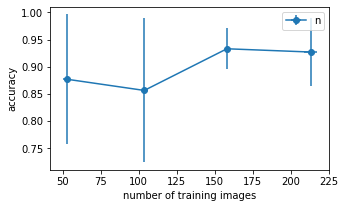

In [12]:
# plot accuracies obtained at different sizes
plt.figure(figsize=(5,3))
plt.errorbar(nums['train_nums'], accs['val'], accs['std'], nums['train_nums_std'], marker='o')
plt.xlabel('number of training images')
plt.ylabel('accuracy')
plt.legend('neural network')

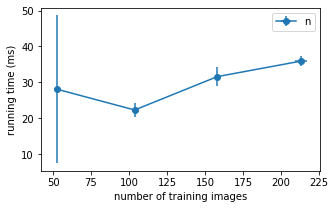

In [13]:
# plot model running times at different sizes
plt.figure(figsize=(5,3))
plt.errorbar(nums['train_nums'], np.array(times['run_t'])*1000, \
             np.array(times['run_t_std'])*1000, nums['train_nums_std'], marker='o')
plt.xlabel('number of training images')
plt.ylabel('running time (ms)')
plt.legend('neural network')

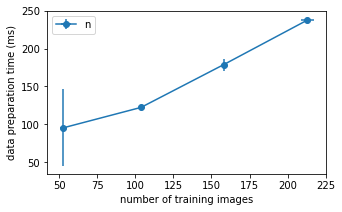

In [14]:
# plot data preparation times at different sizes
plt.figure(figsize=(5,3))
plt.errorbar(nums['train_nums'], np.array(times['data_t'])*1000, \
             np.array(times['data_t_std'])*1000, nums['train_nums_std'], marker='o')
plt.xlabel('number of training images')
plt.ylabel('data preparation time (ms)')
plt.legend('neural network')

# Assess the similarity graph method

In [15]:
sg_opt_params = { 'epsilon0':1, 'epsilon_decay':0.5, 'epsilon_jump': 1.5, \
              'num_its':10, 'check_freq':1, 'print_checks':False, 'Theta0':None, \
              'force_all_its': True, 'threshold': 0.01}


def get_sg_acc(train_data, val_data):
    
    B, stats = sg.fit_graph(train_data['des'], train_data['lbls'], \
                                      sg_opt_params, seed = None)

    acc, y_est, t = sg.get_acc(B, train_data['des'], train_data['lbls'], \
                               val_data['des'], val_data['lbls'])
    
    return acc

In [16]:
portions = [0.005, 0.01, 0.015, 0.02]
rpts = [3]*len(portions)

nums, accs, times = bn.assess(sift_mnist_data, get_sg_acc, portions, rpts, show_msgs = True)

data size  iteration  train_num   val_num     acc(%)   dtime(ms)  rtime(ms) 
----------------------------------------------------------------------------
  0.005        0          52         12       100.0      63.87    5.028e+03 
  0.005        1          51         11       90.91      58.84    5.131e+03 
  0.005        2          49         14       85.71      63.83    5.262e+03 
  0.005     Average     50.667     12.333     92.21      62.18    5.141e+03 



MemoryError: Unable to allocate 5.70 GiB for an array with shape (256, 256, 108, 108) and data type float64